# Projeto: Análise de Vinhos
<hr>

#### Respondendo a perguntas de negócio com base na exploração e análise dos dados<br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
df_wines_original = pd.read_csv('winequality-red.csv', sep=';')

#### Iniciando exploração do dataset

In [3]:
df_wines_original.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df_wines_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


> #### Respondendo às perguntas

### Pergunta 1:
No dataset utilizado para o desafio, quantas instâncias e atributos existem, respectivamente?

In [5]:
df_wines_original.shape

(1599, 12)

### Pergunta 2:
Quantos tipos diferentes de dados existem no dataset do desafio?

In [6]:
df_wines_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Pergunta 3:
Qual é a proporção (em %) de valores nulos existente na coluna "residual sugar" (resíduo de açúcar)?

In [7]:
zero_counts = df_wines_original["residual sugar"].isnull().sum()
zero_counts

0

### Pergunta 4:
Qual é o desvio padrão para a variável "fixed acidity"?

In [8]:
std_fa = df_wines_original["fixed acidity"].std()
print(round(std_fa,1))

1.7


### Pergunta 5:
Qual é a mediana para a variável "residual sugar"?

In [9]:
median_rs = df_wines_original["residual sugar"].median()
print(round(median_rs,1))

2.2


### Pergunta 6:
Sobre o coeficiente de correlação de Pearson entre as variáveis "fixed acidity" e "pH", é CORRETO afirmar:

In [10]:
corr_pd = df_wines_original["fixed acidity"].corr(df_wines_original["pH"])
print(round(corr_pd,2))

-0.68


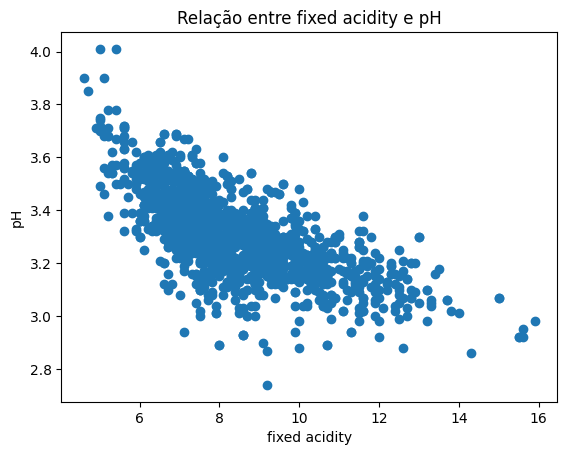

In [11]:
plt.scatter(df_wines_original['fixed acidity'], df_wines_original['pH'])
plt.xlabel('fixed acidity')
plt.ylabel('pH')
plt.title('Relação entre fixed acidity e pH')
plt.show()

### Pergunta 7:
Sobre o coeficiente de correlação de Pearson entre as variáveis "quality" e "alcohol", mesmo sendo reduzido, é CORRETO dizer:

In [12]:
corr_pd_alcohol = df_wines_original["quality"].corr(df_wines_original["alcohol"])
print(round(corr_pd_alcohol,2))

0.48


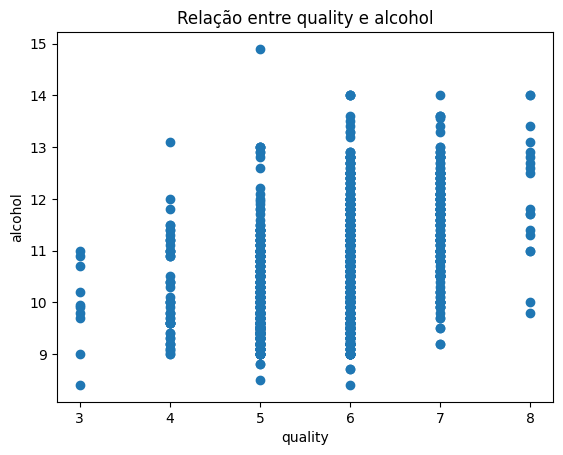

In [13]:
plt.scatter(df_wines_original['quality'], df_wines_original['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.title('Relação entre quality e alcohol')
plt.show()

### Pergunta 8:
Quantas instâncias existem para a qualidade do vinho igual a 5?


In [14]:
qt_quality = df_wines_original[(df_wines_original["quality"] == 5)]
print(qt_quality["quality"].count())

681


### Pergunta 9:
Aplique o modelo de normalização MinMaxScaler com os valores "default" para os dados de entrada. Qual é o menor valor para a variável "fixed acidity"?

In [15]:
scaler = MinMaxScaler()
scaler.fit(df_wines_original)

# Transformando os dados
data_scaled = scaler.transform(df_wines_original)
df_scaled = pd.DataFrame(data_scaled, columns=df_wines_original.columns)
print("\nDados normalizados:\n", df_scaled["fixed acidity"].min())


Dados normalizados:
 0.0


### Pergunta 10:
Após dividir o dataset utilizando o método train_test_split(entradas_normalizadas, saida, test_size=0.30, random_state=1). Qual foi a acurácia para o KNN?

In [16]:
X = df_wines_original.drop('quality', axis=1)
y = df_wines_original['quality']


# Normalizando os dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1)

# Criando e treinando o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Calculando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print("A acurácia do modelo KNN é:", round(accuracy,2))


A acurácia do modelo KNN é: 0.56


### Pergunta 11:
Aplicando o algoritmo de árvore de decisão com os parâmetros definidos no enunciado do desafio e a divisão de treinamento e teste, como mostrado anteriormente, qual é o valor da acurácia?

In [17]:
X = df_wines_original.drop('quality', axis=1)
y = df_wines_original['quality']


# Normalizando os dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1)

# Criando e treinando o modelo Arvore de Decisão
clf_arvore = DecisionTreeClassifier()
clf_arvore.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = clf_arvore.predict(X_test)

# Calculando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print("A acurácia da Árvore de Decisão é:", round(accuracy,2))

A acurácia da Árvore de Decisão é: 0.6


### Pergunta 12:
Aplicando o algoritmo de floresta randômica com os mesmos parâmetros apresentados no enunciado e mesmos valores para o treinamento e teste, qual é o valor mais próximo para a acurácia?

In [18]:
X = df_wines_original.drop('quality', axis=1)
y = df_wines_original['quality']


# Normalizando os dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1)

# Criando e treinando o modelo Random Forest
clf_rf = RandomForestClassifier(max_depth=10, random_state=1)
clf_rf.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = clf_rf.predict(X_test)

# Calculando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print("A acurácia da Random Forest é:", round(accuracy,2))


A acurácia da Random Forest é: 0.68


### Pergunta 13:
Aplicando o algoritmo SVM para a classificação da qualidade dos vinhos com os mesmos valores anteriores para treinamento e teste, qual é o valor mais próximo para a acurácia obtido?

In [19]:
X = df_wines_original.drop('quality', axis=1)
y = df_wines_original['quality']


# Normalizando os dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1)

# Criando e treinando o modelo Random Forest
clf_svm = SVC(gamma='auto',kernel='rbf')
clf_svm.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = clf_svm.predict(X_test)

# Calculando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print("A acurácia do SVM é:", round(accuracy,2))

A acurácia do SVM é: 0.59


### Pergunta 14:
Aplicando a rede MLP, como mostrado no enunciado, e com os mesmos dados de treinamento e teste utilizados, qual é o valor mais próximo para a acurácia do modelo?

In [20]:
X = df_wines_original.drop('quality', axis=1)
y = df_wines_original['quality']


# Normalizando os dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1)

# Criando e treinando o modelo Random Forest
clf_mlp = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)
clf_mlp.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = clf_mlp.predict(X_test)

# Calculando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print("A acurácia do MLP é:", round(accuracy,2))

A acurácia do MLP é: 0.6


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Pergunta 15:
Modifique o dataset para um sistema binário que considere vinhos com nota maior do que 5 (6, 7, 8) sejam bons e menores ou igual a 5 ruins (5, 4, 3). Aplique o modelo da floresta randômica. Qual é o valor mais próximo da acurácia do modelo para esse novo dataset?

In [21]:
df_wines_original['quality'] = pd.to_numeric(df_wines_original['quality'], errors='coerce').apply(lambda x: 0 if x > 5 else 1)

X = df_wines_original.drop('quality', axis=1)
y = df_wines_original['quality']

# Normalizando os dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1)

# Criando e treinando o modelo Random Forest
clf_rfa = RandomForestClassifier(max_depth=10, random_state=1)
clf_rfa.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = clf_rfa.predict(X_test)

# Calculando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print("A acurácia da Random Forest é:", accuracy)

A acurácia da Random Forest é: 0.8041666666666667
